In [1]:
from EMNIST import x_train, y_train, x_test, y_test
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from random import randint, shuffle
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
clf_dtc = tree.DecisionTreeClassifier()

In [20]:
x_train_dtc = list(x_train)
y_train_dtc = y_train
x_test_dtc = list(x_test)
y_test_dtc = y_test

In [4]:
clf_dtc.fit(x_train_dtc, y_train_dtc)

DecisionTreeClassifier()

In [21]:
predicted_dtc = clf_dtc.predict(x_test_dtc)
expected_dtc = y_test_dtc

In [22]:
x_test_dtc = np.array(x_test_dtc)

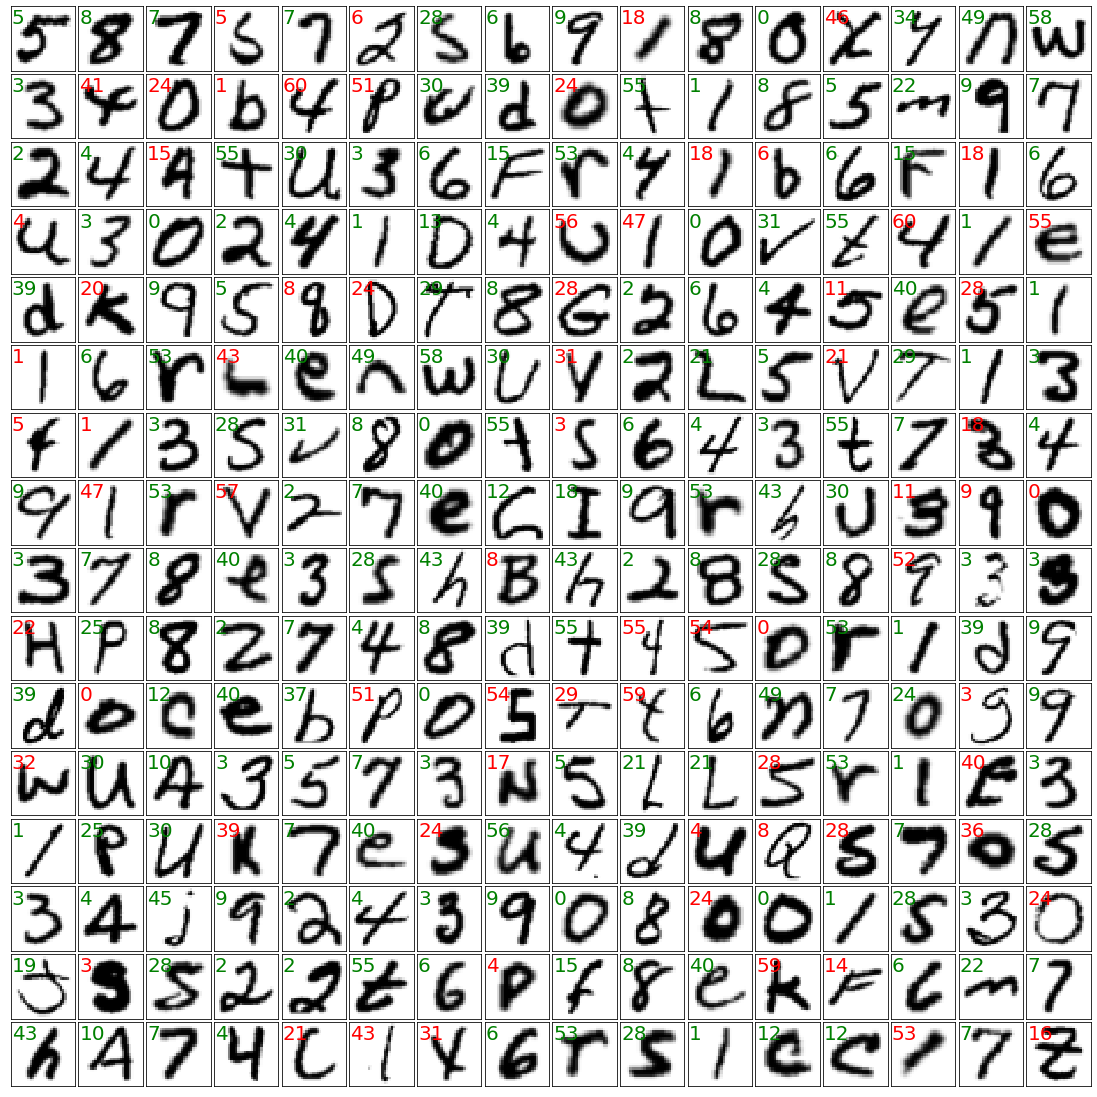

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(predicted_dtc) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_test_dtc.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')
    if predicted_dtc[i] == expected_dtc[i]:
        ax.text(0, 7, str(predicted_dtc[i]), fontsize=20, color='green')
    else:
        ax.text(0, 7, str(predicted_dtc[i]), fontsize=20, color='red')
ax.axis("on")
fig.savefig('DTC EMNIST DESBALANCEADO.png', dpi=fig.dpi, edgecolor="purple")

In [23]:
print(metrics.classification_report(expected_dtc, predicted_dtc))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      5778
           1       0.64      0.63      0.63      6330
           2       0.83      0.82      0.82      5869
           3       0.87      0.87      0.87      5969
           4       0.84      0.82      0.83      5619
           5       0.73      0.73      0.73      5190
           6       0.87      0.87      0.87      5705
           7       0.92      0.92      0.92      6139
           8       0.81      0.79      0.80      5633
           9       0.85      0.83      0.84      5686
          10       0.62      0.60      0.61      1062
          11       0.41      0.37      0.39       648
          12       0.62      0.60      0.61      1739
          13       0.49      0.42      0.45       779
          14       0.58      0.55      0.57       851
          15       0.56      0.56      0.56      1440
          16       0.47      0.45      0.46       447
          17       0.52    

In [24]:
df = pd.DataFrame(metrics.confusion_matrix(expected_dtc, predicted_dtc))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,3386,0,7,10,4,16,31,5,14,7,2,11,26,103,5,3,11,1,3,1,0,1,4,12,1672,6,27,2,10,1,33,1,3,1,3,0,35,8,9,11,15,2,5,0,0,2,0,0,2,15,227,5,2,1,1,4,6,0,3,1,0,2
1,0,3961,11,3,5,3,5,7,14,6,4,0,2,4,0,12,0,1,701,1,1,18,0,0,1,10,1,2,6,8,1,0,2,0,15,2,0,1,0,10,0,3,1,6,118,7,3,1311,0,0,0,3,5,5,2,41,0,1,1,3,2,0
2,24,15,4785,57,5,14,14,57,47,6,17,8,8,12,11,10,6,3,13,34,5,19,4,6,15,10,14,13,26,7,15,3,2,9,5,136,71,8,3,60,14,8,10,7,5,10,7,1,1,8,2,3,8,6,1,11,7,0,3,10,3,167
3,16,9,65,5173,7,75,10,46,66,33,3,32,1,12,0,4,6,0,18,29,1,2,2,1,17,6,3,4,119,6,0,0,1,1,4,3,18,2,1,20,9,4,53,2,1,13,0,5,0,5,0,0,6,1,22,15,0,0,1,4,4,8
4,4,8,13,4,4589,27,16,29,27,88,32,0,8,2,8,27,7,35,2,5,9,1,17,22,6,9,6,4,8,8,48,27,11,5,75,0,13,3,2,18,16,19,12,17,2,3,6,5,8,17,0,3,15,15,3,93,27,20,9,6,98,2
5,15,5,9,73,11,3788,31,7,54,24,4,20,13,9,31,33,11,1,16,31,4,2,4,3,10,5,5,7,652,30,5,2,5,2,5,1,7,8,3,3,12,14,20,6,2,6,8,2,2,2,1,1,2,31,101,20,1,2,2,2,3,1
6,17,8,5,12,10,36,4966,1,29,4,8,11,20,10,13,16,63,3,5,2,2,39,4,4,9,3,5,0,15,1,22,2,11,1,0,1,12,178,10,15,8,7,4,32,4,4,6,13,4,3,3,2,3,0,4,17,6,2,6,0,2,2
7,1,16,42,53,19,11,2,5636,25,62,4,2,0,4,1,13,1,1,8,6,0,0,3,0,0,18,3,0,7,58,0,1,0,3,21,4,1,0,0,1,2,1,9,0,5,5,1,4,1,12,1,3,14,5,2,32,0,0,0,2,10,3
8,16,13,53,64,28,63,35,20,4477,70,5,81,7,8,34,38,8,6,14,6,6,1,2,6,15,46,3,17,60,10,2,7,2,9,8,11,18,8,3,15,46,12,50,2,9,4,11,7,0,3,2,15,57,23,8,40,3,9,2,15,9,11
9,3,5,11,33,91,40,2,92,71,4702,7,3,2,0,0,18,3,1,2,0,0,0,4,1,4,16,16,3,34,9,4,1,1,1,14,0,20,0,1,0,3,10,192,0,1,1,0,4,0,2,0,9,221,2,5,11,1,1,0,1,7,0


In [10]:
train_counts = list()
y_train_dtc = list(y_train)
for i in range (62):
    train_counts.append(y_train_dtc.count(i))
for i in range (len(y_train_dtc)):
    y_train_dtc[i] = [y_train_dtc[i], i]
y_train_dtc.sort()
x_train_balanced = list()
y_train_balanced = list()
n = 1895
intervalos = list()
for i in range (62):
    inf = sum(train_counts[:i]) + 1
    inf_mas_1 = sum(train_counts[:i+1])
    sup = min(inf + n, inf_mas_1)
    intervalos.append([inf, sup])
for i in range (62):
    y_train_balanced.extend(y_train_dtc[intervalos[i][0]:intervalos[i][1]])
shuffle(y_train_balanced)
for i in range (len(y_train_balanced)):
    x_train_balanced.append(x_train_dtc[y_train_balanced[i][1]])
    y_train_balanced[i] = y_train_balanced[i][0]
clases62 = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [12]:
inicio = time.time()
clf_dtc2 = tree.DecisionTreeClassifier()
clf_dtc2.fit(x_train_balanced, y_train_balanced)
fin = time.time()
print(fin - inicio)

125.4844536781311


In [13]:
y_test_dtc = list(y_test)
test_counts = list()
for i in range (61):
    test_counts.append(y_test_dtc.count(i))
for i in range (len(y_test)):
    y_test_dtc[i] = [y_test[i], i]
y_test_dtc.sort()
x_test_balanced = list()
y_test_balanced = list()
n = 317
intervalos = list()
for i in range (62):
    inf = sum(test_counts[:i]) + 1
    sup = inf + n
    intervalos.append([inf, sup])
for i in range (62):
    y_test_balanced.extend(y_test_dtc[intervalos[i][0]:intervalos[i][1]])
shuffle(y_test_balanced)
for i in range (len(y_test_balanced)):
    x_test_balanced.append(x_test[y_test_balanced[i][1]])
    y_test_balanced[i] = y_test_balanced[i][0]

In [14]:
predicted_dtc = clf_dtc.predict(x_test_balanced)
expected_dtc = y_test_balanced
predicted_dtc2 = clf_dtc2.predict(x_test_balanced)
expected_dtc2 = y_test_balanced

In [15]:
print(metrics.classification_report(expected_dtc2, predicted_dtc2))

              precision    recall  f1-score   support

           0       0.34      0.33      0.33       317
           1       0.35      0.32      0.33       317
           2       0.52      0.45      0.48       317
           3       0.69      0.67      0.68       317
           4       0.56      0.54      0.55       317
           5       0.48      0.49      0.49       317
           6       0.61      0.63      0.62       317
           7       0.80      0.80      0.80       317
           8       0.56      0.52      0.54       317
           9       0.54      0.51      0.53       317
          10       0.56      0.54      0.55       317
          11       0.51      0.48      0.49       317
          12       0.41      0.43      0.42       317
          13       0.58      0.56      0.57       317
          14       0.59      0.59      0.59       317
          15       0.38      0.39      0.39       317
          16       0.57      0.59      0.58       317
          17       0.53    

In [16]:
df = pd.DataFrame(metrics.confusion_matrix(expected_dtc2, predicted_dtc2))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,104,0,1,2,1,2,1,1,0,0,2,6,3,19,1,0,3,0,0,0,0,0,0,1,72,1,6,0,0,0,0,1,0,0,0,0,4,1,1,2,1,0,1,0,0,0,0,1,0,1,72,2,0,0,0,1,1,0,0,0,1,1
1,1,103,0,0,0,0,0,0,0,2,0,0,2,0,0,2,0,0,62,0,1,2,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,4,0,1,27,4,0,95,0,0,0,0,0,0,1,3,0,1,0,1,0,0
2,1,0,143,6,2,2,0,3,2,2,2,4,1,4,2,0,4,1,1,7,1,4,0,3,0,0,4,4,4,1,3,1,2,1,0,23,12,1,0,2,0,0,7,2,3,2,2,2,0,0,2,2,4,0,3,2,2,0,0,2,0,29
3,1,0,2,211,0,6,0,1,3,2,0,7,0,4,2,3,1,0,1,12,0,0,0,0,1,0,0,1,10,0,0,0,0,0,0,2,5,1,0,2,0,0,12,1,1,9,0,1,0,1,0,0,1,0,8,0,0,1,0,0,1,3
4,0,0,1,0,172,0,0,1,0,7,1,2,0,0,0,2,0,15,0,0,1,2,4,1,0,3,3,1,0,1,5,1,1,1,13,0,2,1,1,1,1,4,6,3,0,1,1,0,1,3,0,1,9,0,1,11,3,5,1,1,22,0
5,2,1,1,5,2,156,2,1,6,0,0,3,2,0,9,2,3,0,1,9,1,1,0,1,0,1,1,2,36,1,0,3,0,1,4,1,2,2,1,1,2,2,8,0,3,2,0,0,0,0,0,0,0,1,32,1,0,0,0,1,1,0
6,3,1,0,1,0,2,200,0,1,0,0,4,2,3,2,1,27,1,0,0,0,3,1,2,1,0,3,0,2,0,1,1,4,0,0,0,2,21,4,3,0,0,2,3,0,2,1,1,1,1,1,0,0,0,0,1,4,1,0,3,0,0
7,0,2,3,1,3,0,0,253,4,7,1,0,1,1,0,2,0,0,1,1,0,0,0,0,0,1,1,0,1,7,0,0,0,1,5,3,0,0,0,0,0,1,4,0,0,0,1,1,0,1,2,1,5,0,0,0,0,0,0,0,1,1
8,0,0,3,6,2,3,3,0,166,4,5,16,1,0,3,2,2,2,0,2,3,1,1,1,0,3,2,4,3,0,0,2,1,1,0,6,2,1,0,1,1,6,15,1,3,1,2,0,1,0,0,3,12,6,4,3,1,0,0,2,3,1
9,0,0,0,4,4,3,0,6,3,163,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,4,2,2,0,1,0,0,0,1,2,0,0,0,0,0,0,3,45,0,2,0,0,0,0,0,1,0,61,0,1,1,1,1,0,0,2,0


In [17]:
df = pd.DataFrame(metrics.confusion_matrix(expected_dtc, predicted_dtc))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,179,0,0,1,0,1,1,0,0,1,0,0,1,7,0,1,0,0,0,0,0,0,1,1,99,0,2,0,0,0,1,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,1,0,0,0,0,0
1,0,188,0,0,0,0,0,1,1,1,0,0,0,2,0,1,0,1,36,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,8,1,0,69,0,0,0,0,0,0,0,3,0,0,0,0,0,0
2,4,0,255,0,0,2,1,3,4,0,4,0,0,0,1,1,2,0,0,5,0,2,0,0,0,1,0,0,1,0,1,0,0,0,0,6,5,0,0,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,0,9
3,1,2,7,264,0,1,1,2,7,3,0,3,0,1,0,0,1,0,0,2,0,0,0,1,1,0,0,0,5,0,0,0,0,0,0,0,2,0,0,1,0,0,5,0,0,2,0,1,0,0,0,0,0,0,2,1,0,0,0,0,1,0
4,1,0,0,0,260,3,1,4,2,4,2,0,1,0,0,1,1,2,0,0,0,0,0,3,0,0,0,0,1,0,2,1,1,0,2,0,0,0,0,0,0,1,1,2,0,0,0,0,0,1,0,0,2,1,1,7,1,0,1,0,7,0
5,0,0,0,1,0,228,2,0,1,2,0,1,0,1,3,2,1,0,1,4,2,1,1,0,1,0,0,0,47,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,6,2,0,0,0,0,1,0
6,3,0,0,1,0,1,280,0,0,0,0,1,1,1,3,1,1,1,1,0,0,2,0,1,1,0,0,0,2,0,1,0,0,0,0,0,0,9,0,0,1,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,2,1,4,3,1,0,287,0,2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0
8,1,0,1,8,4,3,0,1,255,4,1,2,0,1,2,2,0,0,1,0,0,0,0,0,1,3,0,1,2,1,0,1,0,0,0,0,1,0,1,1,4,1,4,0,0,0,2,0,0,0,0,1,5,1,0,1,0,0,0,0,0,0
9,0,0,0,2,4,3,1,5,4,266,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,13,1,1,1,0,0,0,0,0,0


In [19]:
print(metrics.classification_report(expected_dtc, predicted_dtc))

              precision    recall  f1-score   support

           0       0.29      0.56      0.39       317
           1       0.31      0.59      0.41       317
           2       0.42      0.80      0.56       317
           3       0.60      0.83      0.70       317
           4       0.47      0.82      0.60       317
           5       0.47      0.72      0.57       317
           6       0.55      0.88      0.68       317
           7       0.74      0.91      0.81       317
           8       0.49      0.80      0.61       317
           9       0.46      0.84      0.60       317
          10       0.66      0.63      0.65       317
          11       0.65      0.41      0.50       317
          12       0.44      0.65      0.52       317
          13       0.69      0.40      0.51       317
          14       0.68      0.52      0.59       317
          15       0.41      0.51      0.46       317
          16       0.78      0.45      0.57       317
          17       0.72    